In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
dir = 'UEyes-DS/part1_mobile/'
finaldir = 'UEyes-DS/part1_SAM/'
n = len(dir)

In [3]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)


In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "SAM/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

Current file: UEyes-DS/part1_mobile/006450.jpg
Segmentation to: UEyes-DS/part1_SAM/006450.jpg
[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 54699, 'bbox': [41, 414, 190, 289], 'predicted_iou': 1.0782854557037354, 'point_coords': [[227.8125, 435.0]], 'stability_score': 0.9913390278816223, 'crop_box': [0, 0, 540, 960]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, 

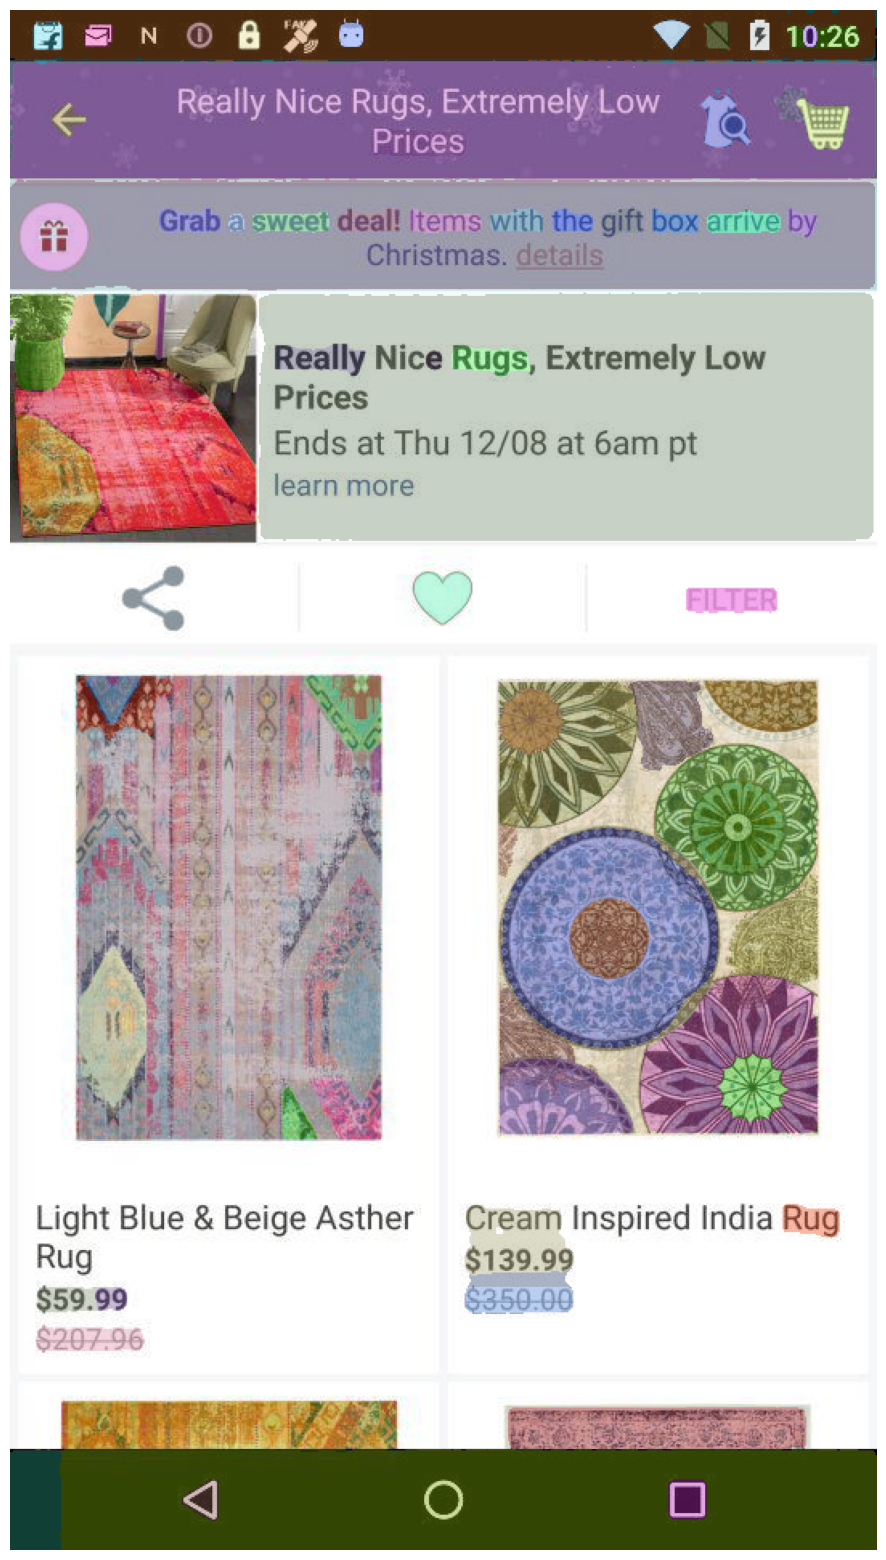

In [22]:
import codecs, json

masks2 = {}

for file in os.scandir(dir):
    
    print("Current file: " + file.path)
    print("Segmentation to: " + finaldir + file.path[n:])
    
    image = cv2.imread(file.path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masks = mask_generator.generate(image)
    
    seglist = []

    for i in range(len(masks)):
        toapp = {}
        for key in masks[i].keys():
            if key != 'segmentation':
                toapp[key] = masks[i][key]
        seglist.append(toapp)
                
    masks2[file.path[n:]] = seglist
        
    # ndarray for individual elts
    
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks)
    plt.axis('off')
    plt.savefig(finaldir + file.path[n:], bbox_inches='tight', pad_inches=0)
    
json.dump(masks2, codecs.open(finaldir + file.path[n:] + "sam_annotations_part1.json", 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)

    

NameError: name 'masks2' is not defined